# Python Translate Script
##### IMPORTANT: install BioPython so that this will work

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

### 1. Dr. X: this gets sequences. 
### Please finish documenting this function with comments, or in notebook markdown text. Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [2]:
def get_sequences_from_file(fasta_fn):
    """Descrption of get_sequences_from_file() function
    
    Creates a dictionary.
    Populates the dictionary iterating trough a FASTA file.
        From each identifier, gets the species name as a key, and the nucleotide sequence as a value.
    
    Parameters:
        fasta_fn : a FASTA file, 
                        * a header line starting with a '>' followed by descriptions
                        * string of nucleotides starting in the second line
    Return:
        A dictionary of sequences.
                        * dict.key() as 'species_name' parses the second and the third element from the header line
                        * dict.values() as 'record.seq' is a Bio.Seq element which is the dna sequence for each identifier   
    """
    sequence_data_dict = {}                                    # creates an empty diccionary

    for record in SeqIO.parse(fasta_fn, "fasta"):              # iterates through each record in the fasta file `fasta_fn` 

        description = record.description.split()               # separates the record description  

        species_name = description[1] + " " + description[2]   # parse species_name combining element 1 and 2 (second and third, Genus and species)
        
        sequence_data_dict[species_name] = record.seq          # add the seq() object belonging to each record [record.seq] as a dictionary value, under genus ans species information as a dictionary key. 

    return(sequence_data_dict)                                 # returns the complete dictionary after finishing the loop

### 2. YOUR STRING-TRANSLATE FUNCTION ########

In [3]:
def translate_function(dna_string):
    
    """Description of translate_function 
    
    Translates a DNA string into an aminoacid string.
    
    Parameters:
        dna_string : a string of nucleotides
    
    Return: aa sequence for the protein coded in dna_string, as a string
    
    Example of usage:
    
        >> translate_function('GCGGCTTCATAGGAG')
        
        Output: 
            'AASE'
   
    """
    
    aa_seq_string = "" # start aa string as an empty string
    
    for i in range(0, len(dna_string), 3):  # iterate through the string in steps of 3
        
        codon = dna_string[i: i + 3]        # subset the string from the element i to i+3, send it to `codon`
        
        codon_seq = Seq(codon)              # turns `codon` into a Seq() object
        
        # use df.translate() to translate codon into aminoacid (aa)  
        aa = codon_seq.translate(table = "Vertebrate Mitochondrial", to_stop = True)

        aa_seq_string += aa                 # add the last translated aa to the aa string first defined
    
    return str(aa_seq_string)               # return the aa sequence as a string

### 3. Is there a better way to write the translation function? (Hint: yes there is.) Perhaps using available BioPython library utilities? Please also write this function.

In [4]:
from Bio.Seq import Seq
def translate_to_protein(dna_string):
    """Description of translate_to_protein function 
    
    Translates a DNA string into a aminoacid string when the appropriate datatype is provided, or give an error message.
    
    Parameters:
        string_nucleotides : a string of nucleotides
    
    Return: aa sequence for the protein coded in string_nucleotides
            Error messagge when an invalid parameter in used as input 
    
    Example of usage:
    
        >> translate_to_protein('GCGGCTTCATAGGAG')
        
        Output: 
            AAS*E
   
    """
    if type(dna_string) == str:
        
        aa_seq = Seq(dna_string).translate()
        
        return print(aa_seq)
    else:
        
        return print('Error: Invalid object')

### 4. Write a function that calculates the molecular weight of each amino acid sequence.

In [5]:
def trans_func( dna_string ):
    """ Decription for translation formula
    
    Translate a DNA string into a aminoacid string, and returns its molecular weight 
    
    Parameters:
        dna_string : a string of nucleotides 
    
    Return:
        molecular weight for the encoded protein
    
    Example of usage:
        >> trans_func("ACGACCGGA")
        
        Output: 
            277.2744
        
    """
    coding_dna = Seq( dna_string )
    
    aa_string = coding_dna.translate( table = "Vertebrate Mitochondrial", to_stop = True) 
    
    analysed_seq = ProteinAnalysis( str( aa_string ) )
    
    molecular_weight = analysed_seq.molecular_weight()
    
    return molecular_weight

### 5.  Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [6]:
def CG_content(string_nucleotides):
    """Description CG content calculator
    
    Calculates the CG content % for a given DNA string
    
    Parameters:
        string_nucleotides : a string of nucleotides or a Seq() object
    
    Return: CG content in the string as a percentage
    
    Example of usage:
        Using a string
        >> CG_content("ACGACCGGAC")
        
        Output: 
            70.0
   
        Using a Seq() object  
        >> ms = Seq("ACGGCTTACCGGAC")
        >> CG_content(ms)
        
        Output: 
            64.28571428571429   
                
    """
    nuc_string = str(string_nucleotides) # force string or Seq() object as a string

    seq_up = nuc_string.upper()          # force string to be uppercase
    
    my_seq = Seq(seq_up)                 # turn string into a seq() object
    
    # calculate CG content
    cg_count = 100*((my_seq.count("G") + my_seq.count("C")) /len(my_seq))
    
    return(cg_count) # return the percent of CG

#   MAIN

In [7]:
# Use get_sequences_from_file() to creates a dictionary for the DNA sequences of the cit-b proteins of each bear species
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

# Creates a pandas DataFrame reading bears_mass.csv, including species and body mass.
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 

species_list = list(bears_df.species)    # get the list of species in the dataframe

bears_df # checking the dataframe

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


### 6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content. Set the value to 'NaN' to indicate that these cells are currently empty.

In [8]:
bears_df['Mol weight'] = 'NaN' # Creates a new column setting a common value to each element in the column

bears_df['CG content'] = 'NaN'

bears_df # Print df 

,species,mass,Mol weight,CG content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


### 7. Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [9]:
bears_pd = bears_df.set_index('species') # set 'species' as index to facilitate iteration  

i = 'NULL'                               # set iterative variable as NULL 

for i in cytb_seqs.keys():               # iterate through each key (species) in the dictionary cytb_seqs  

    dna_string = cytb_seqs[i]               # get the value (dna sequence, string) for the ith key in the cytb_seqs, and call it 'dna_string' 
    
    MW = trans_func(str(dna_string))        # apply trans_func() to dna_string. Get molecular weight (float) for i and stored it as MW 
    
    CG = CG_content(dna_string)             # apply GC_content() to dna_string. Get CG content (float) for i and stored it as CG 
    
    bears_pd.at[i, 'CG content'] = CG       # replace 'CG content' for index (specie) i, by the ith float stored as CG
    
    bears_pd.at[i, 'Mol weight'] = MW       # replace 'Mol weight' for index (specie) i, by the ith float stored as MW
    
bears_pd = bears_pd.reset_index()        # reset the original indexes. Moves species back to a column


bears_pd                                 # Print df

,species,mass,Mol weight,CG content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


### 8. Plot a bar-chart of the mass with the x-axes labeled with species names.

<AxesSubplot:title={'center':'Bears body mass by species'}, xlabel='Species', ylabel='Body mass [Kg]'>

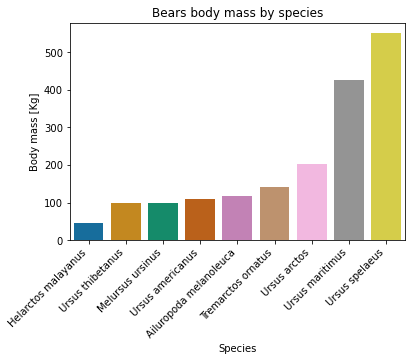

In [10]:
# Barplot from seaborn
# Barplot stored as *weights*

weights = sns.barplot(
            data = bears_pd,
            x = 'species', 
            y = "mass", 
            order = bears_pd.sort_values('mass').species, # sort species by weight 
            palette = "colorblind")

# Adjustments on axis and title 

plt.xticks(rotation = 45,                   # rotate labels for bars
           horizontalalignment = 'right')   # align labels properly below each bar
plt.xlabel('Species')
plt.ylabel("Body mass [Kg]")
plt.title("Bears body mass by species")
weights

#### *Q1*: What is the largest bear species? 
*Ursus spelaeus*, followed by *Ursus maritimus*.

#### *Q2*: What else is interesting about this species?
*Ursus spealaeus* is an extinct species. Is noticeable the wide diversity in body mass among species from the same genus, given the largest species is 550 kg, but the smallest in this dataset is about 100 kg (*Ursus thibetanus*). All of the other bears in the same genus correspond to species that are currently founded in nature, although some of them are endangered.

### 9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).


Text(0.5, 1.0, 'Cytochrome b: Molecular weight vs CG content')

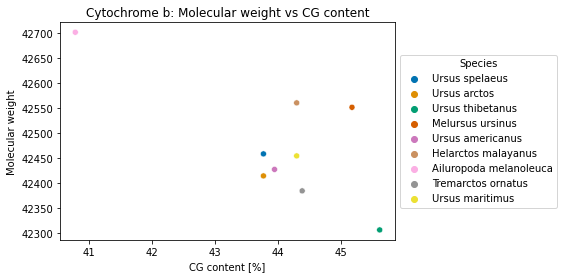

In [11]:
# Seaborn library for creating a scatterplot
# Scatterplot stored in the memory as CG_to_MW
CG_to_MW = sns.scatterplot(data = bears_pd,
                           x = "CG content",
                           y = "Mol weight",
                           hue = 'species',
                           palette = "colorblind")

# Adjustments in legends, axis and titles
CG_to_MW.legend(title = 'Species', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('CG content [%]')
plt.ylabel("Molecular weight")
plt.title("Cytochrome b: Molecular weight vs CG content")


### 10. Save the new DataFrame to a file called "bears_mass_cytb.csv"



In [12]:
# df.to_csv() Pandas function for writting csv files

bears_pd.to_csv("bears_mass_cytb.csv", index = False) 

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)



In [13]:
bears_pd

,species,mass,Mol weight,CG content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


In [14]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
align1 = MultipleSeqAlignment(
    [
        SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
        SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
        SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
    ]
)
my_alignments = [align1]
my_alignments

from Bio import AlignIO
AlignIO.write(my_alignments, "my_example.phy", "phylip")



1

### 12. Sources of information and code

Biopython Tutorial and Cookbook. http://biopython.org/DIST/docs/tutorial/Tutorial.pdf

Biopython. Introduction to SeqIO. https://biopython.org/wiki/SeqIO

EEOB/BCB 546: Programming with Python. https://eeob-biodata.github.io/BCB546X-python/

Pandas Documentation. https://pandas.pydata.org/docs/index.html

ProtParam Information page. https://biopython.org/wiki/ProtParam

Seaborn Documentation. https://seaborn.pydata.org/tutorial.html